In [ ]:
import argparse, os, sys, datetime, glob, importlib, csv
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

os.chdir('/camin1/chlee/latent-diffusion-keratopathy')
sys.path.append('/camin1/chlee/latent-diffusion-keratopathy')
sys.path.append('/camin1/chlee/taming-transformers')
sys.path.append('/camin1/chlee/clip-master')

import numpy as np
import time

from omegaconf import OmegaConf
from PIL import Image


In [4]:
# sys.path.remove('/camin1/chlee/latent-diffusion-main')

In [7]:
os.getcwd()

'/camin1/chlee/latent-diffusion-keratopathy'

In [8]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import math
from main import DataModuleFromConfig

In [11]:
# 경로 설정
event_file = '/camin1/chlee/latent-diffusion-keratopathy/logs/L_slit/L_slit/ver1/events.out.tfevents.1754463095.node01.68830.0' # need to be changed

# TensorBoard 로그 로딩
ea = event_accumulator.EventAccumulator(event_file)
ea.Reload()

In [12]:
# ea에 어떤 데이터가 있는지 출력
print(ea.Tags())

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['hp_metric', 'val/rec_loss', 'val/total_loss', 'val/logvar', 'val/kl_loss', 'val/nll_loss', 'val/d_weight', 'val/disc_factor', 'val/g_loss', 'val/disc_loss', 'val/logits_real', 'val/logits_fake', 'epoch', 'aeloss_epoch', 'discloss_epoch', 'lr-Adam', 'lr-Adam-1', 'aeloss_step', 'train/total_loss', 'train/logvar', 'train/kl_loss', 'train/nll_loss', 'train/rec_loss', 'train/d_weight', 'train/disc_factor', 'train/g_loss', 'discloss_step', 'train/disc_loss', 'train/logits_real', 'train/logits_fake'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [13]:
# 로그 키 설정 (실제 로그에 맞게)
train_key = 'aeloss_epoch' # need to be changed
val_key = 'val/rec_loss'

train_loss = ea.Scalars(train_key)
val_loss = ea.Scalars(val_key)

In [14]:
# step/value 추출
train_values = [e.value for e in train_loss]
val_values = [e.value for e in val_loss]

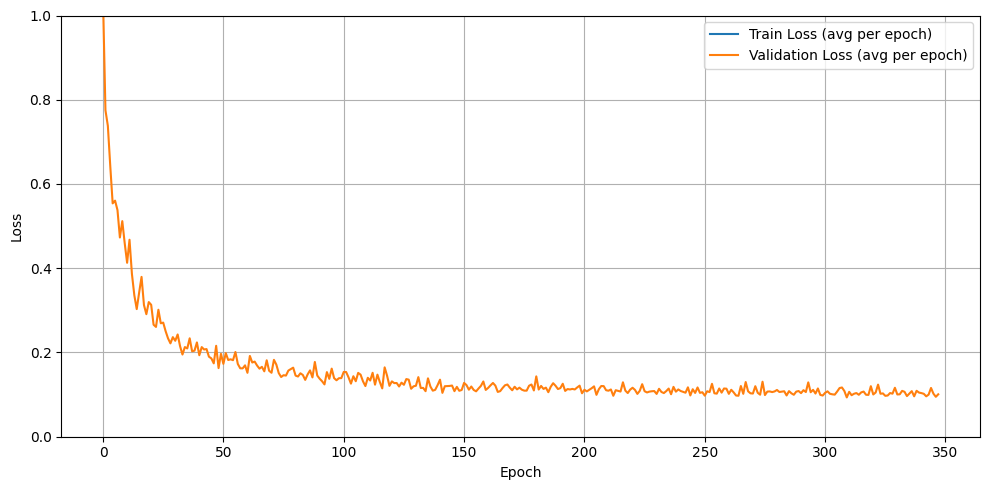

In [35]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_values[:len(val_values)], label='Train Loss (avg per epoch)')
plt.plot(val_values[:len(val_values)], label='Validation Loss (avg per epoch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.title(f'Train and Validation Loss (Epoch 0 to {usable_epochs-1})')
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
best_idx = np.argmin(train_values)

In [ ]:
best_idx

396

In [ ]:
train_values[best_idx]

10415.3798828125